# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

### Group 43

* Andrea M. Ruiz G. - A01794631
* Josías Ruiz P. - A00968460
* Saúl Y. Salgueiro L. - A0XXXXXXX
* Jesús Á. Salazar M. - A00513236

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

### Download Cifar10 dataset

In [ ]:
# checks if CUDA is available
torch.cuda.is_available()

False

In [ ]:
DATA_PATH = '/your_path'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:03<00:00, 44854619.44it/s]


Extracting /your_path/cifar-10-python.tar.gz to /your_path
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /your_path
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
train_loader.batch_size

64

In [ ]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Streaming output truncated to the last 5000 lines.
          [ 8.8585e-01,  1.2986e+00,  1.0446e+00,  ..., -9.2411e-01,
           -9.8762e-01, -9.8762e-01],
          [ 5.2068e-01,  5.6831e-01,  4.0954e-01,  ..., -9.5586e-01,
           -1.0035e+00, -9.5586e-01],
          ...,
          [-3.5254e-01, -4.0017e-01, -6.5420e-01,  ...,  1.5527e+00,
            1.4733e+00,  1.4257e+00],
          [-1.6202e-01, -6.0657e-01, -4.0017e-01,  ...,  1.6321e+00,
            1.6003e+00,  1.5844e+00],
          [-1.9132e-02, -4.7956e-01, -3.2547e-03,  ...,  1.6797e+00,
            1.6003e+00,  1.5685e+00]],

         [[ 1.4539e+00,  1.7928e+00,  1.6637e+00,  ..., -8.0545e-01,
           -9.1842e-01, -1.1282e+00],
          [ 1.2118e+00,  1.5669e+00,  1.3571e+00,  ..., -9.1842e-01,
           -9.5070e-01, -9.5070e-01],
          [ 8.2450e-01,  8.7291e-01,  7.2767e-01,  ..., -9.8297e-01,
           -9.9911e-01, -9.0228e-01],
          ...,
          [ 3.3729e-02,  1.3056e-01,  1.7591e-02,  ...,  1.56

### Using  GPUs

In [ ]:
# defines the device where tensors will be allocated
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: frog


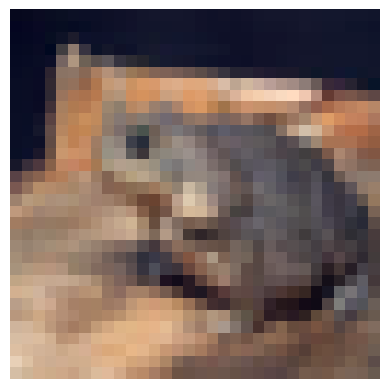

In [ ]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


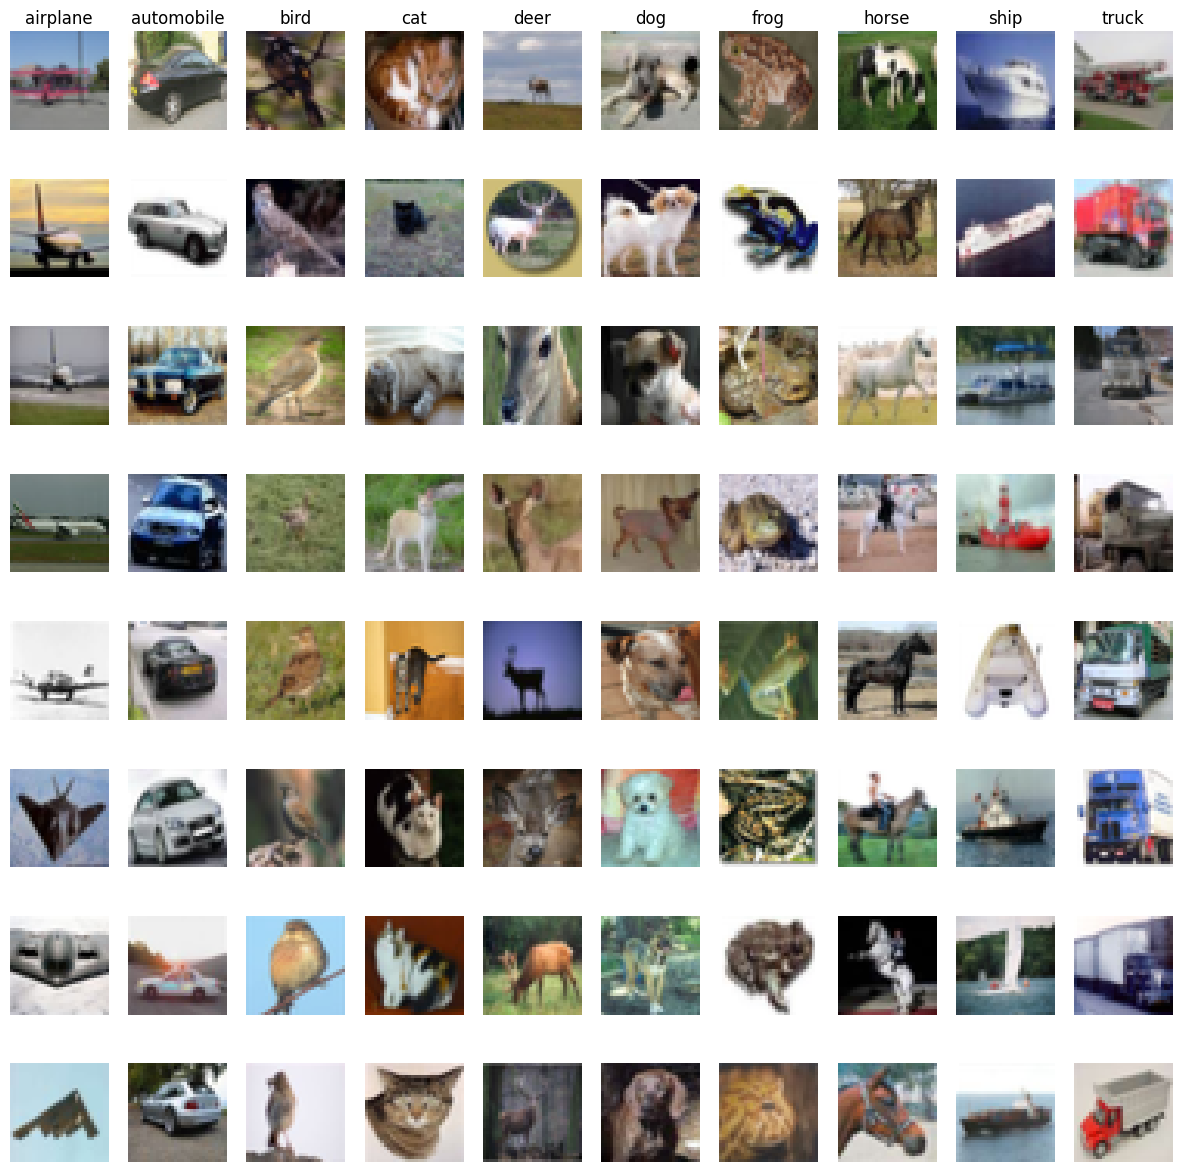

In [ ]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [ ]:
def accuracy(model, loader):
    """
        Parameters:
            model : nn.Sequential, required
                Specify a CNN torch model
                
            loader : Dataloader, required
                iterable dataset
        
        Returns:
            float
                models accuracy
    """
    num_correct = 0                                                 # keeps track of the right predictions
    num_total = 0                                                   # keeps track of number of predictions
    model.eval()                                                    # sets the model in evaluation mode
    model = model.to(device=device)                                 # loads model into the given device
    with torch.no_grad():                                           # disables gradient calculation
        for xi, yi in loader:                                      
            xi = xi.to(device=device, dtype = torch.float32)        # loads tensors into the given device
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi)                                      # compute prediction
            _, pred = scores.max(dim=1)                             # compute prediction result
            num_correct += (pred == yi).sum()                       
            num_total += pred.size(0)
        return float(num_correct)/num_total                         # computes accuracy

### Loop de entrenamiento

In [ ]:
def train(model, optimiser, epochs=100):
    """
        Parameters:
            model : nn.Sequential, required
                Specify a CNN torch model
                
            optimiser : torch.optim.Optimizer, required
                Specify the optimizer that will help managing dynamically generated parameters

            epochs: int, required
                number of times all training data is used once to update the parameters
    """  
    model = model.to(device=device)                                 # loads model into the given device
    for epoch in range(epochs):
        for i, (xi,yi) in enumerate(train_loader):
            model.train()                                           # trains model
            xi = xi.to(device=device, dtype = torch.float32)        # loads tensors into the given device
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi)                                      # computes predictions
            cost=F.cross_entropy(input=scores, target=yi)           # runs activation function
            optimiser.zero_grad()                                   # sets gradients to None
            cost.backward()                                        
            optimiser.step()                                        # updates parameters
        acc = accuracy(model, val_loader)                           # computes accuracy for the given epoch
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy {acc},')

### Linear model

In [ ]:
# Define hyperparamaters
hidden1 = 256               
hidden =256
lr = 0.001                  # specify the learning rate
epochs = 10                 # specify the number of epochs


# creates instance of nn.Sequential (CNN model based on Linear models)
# CIFAR-10 dataset consist of 32*32 color images (input features 32*32*3) in 10 classes (output features)

model1 = nn.Sequential(nn.Flatten(),
                       nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=10))

# creates instance of torch.optim.Adam
# According to https://arxiv.org/abs/1412.6980
# Adam is an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

In [ ]:
# trains linear CNN model
train(model1, optimiser, epochs)

Epoch: 0, costo: 1.006168007850647, accuracy 0.4644,
Epoch: 1, costo: 1.0683525800704956, accuracy 0.5022,
Epoch: 2, costo: 1.3203473091125488, accuracy 0.5026,
Epoch: 3, costo: 1.4266562461853027, accuracy 0.5238,
Epoch: 4, costo: 1.049458622932434, accuracy 0.5192,
Epoch: 5, costo: 0.725355863571167, accuracy 0.5264,
Epoch: 6, costo: 1.291439414024353, accuracy 0.5254,
Epoch: 7, costo: 0.766158938407898, accuracy 0.5284,
Epoch: 8, costo: 0.9726603627204895, accuracy 0.5248,
Epoch: 9, costo: 0.8249049782752991, accuracy 0.5294,


### Sequential CNN

In [ ]:
# Define hyperparamaters
channel1 = 16                       
channel2 = 32                       
epochs = 10                         # specify the number of epochs

modelCNN1 = nn.Sequential(nn.Conv2d(in_channels = 3,            # Number of channels in the input image
                                    out_channels=channel1,      # Number of channels produced by the convolution
                                    kernel_size = 3,            # Specify that kernel to be used is 3x3
                                    padding=1),
                          nn.ReLU(),
                          nn.Conv2d(in_channels=channel1,       # Number of channels in the input image
                                    out_channels = channel2,    # Number of channels produced by the convolution
                                    kernel_size=3,              # Specify that kernel to be used is 3x3
                                    padding=1),
                          nn.ReLU(),
                          nn.MaxPool2d(2, 2),
                          nn.Flatten(),
                          nn.Linear(in_features=16*16*channel2, out_features=10))   # output features gets set to 10

# creates instance of torch.optim.Adam
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)

In [ ]:
# trains sequencial CNN model
train(modelCNN1, optimiser, epochs)

Epoch: 0, costo: 0.9814690351486206, accuracy 0.6256,
Epoch: 1, costo: 0.8088122606277466, accuracy 0.6542,
Epoch: 2, costo: 1.1190447807312012, accuracy 0.6714,
Epoch: 3, costo: 0.9684708118438721, accuracy 0.6806,
Epoch: 4, costo: 0.7878708839416504, accuracy 0.6834,
Epoch: 5, costo: 0.5630087852478027, accuracy 0.6726,
Epoch: 6, costo: 0.4526514410972595, accuracy 0.6748,
Epoch: 7, costo: 0.6285176277160645, accuracy 0.677,
Epoch: 8, costo: 0.2619326114654541, accuracy 0.6746,
Epoch: 9, costo: 0.851004421710968, accuracy 0.6642,


In [ ]:
# logs the the sequencial CNN model accuracy
accuracy(modelCNN1, test_loader)

0.6468